### ***Analyzing two variables simultaneously to determine if a relationship or correlation exists between them.***

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
data1 = pd.read_csv('../../ML_algos/SHAP/human_personality_dataset.csv')
data1.head()

,id,has_glasses,skin_tone,hair_type,gender,age_group,personality,height
0,1,Yes,Dark,Straight,Other,Senior,Confident,Taller
1,2,No,Medium,Curly,Other,Teen,Rude,Shorter
2,3,Yes,Medium,Straight,Male,Teen,Rude,Taller
3,4,Yes,Dark,Wavy,Male,Senior,Confident,Taller
4,5,Yes,Dark,Straight,Other,Adult,Friendly,Shorter


In [74]:
data1["has_glasses"] = data1["has_glasses"].map({'Yes': 1, 'No': 0})

## **Catagorical-Catagorical**
---

### **HEATMAP**

<Axes: xlabel='age_group-personality', ylabel='has_glasses'>

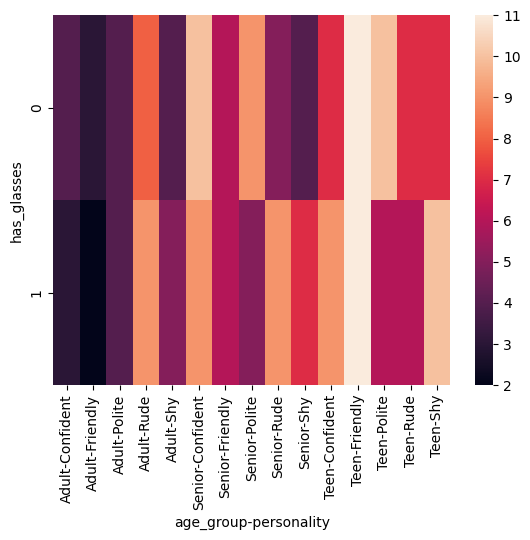

In [75]:
sns.heatmap(pd.crosstab(data1['has_glasses'], [data1['age_group'], data1['personality']]))
# visualise the relationship between 

- From this plot we can say that `Adult-friendly` has least number of people who have glasses and `Teen-Friendly` has greatest
- But this may happen also for data entry counts -> % analysis is better way

<Axes: xlabel='has_glasses', ylabel='age_group-personality'>

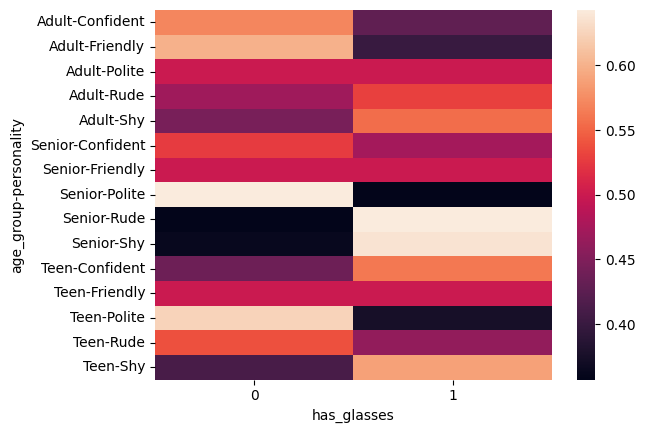

In [76]:
sns.heatmap(data1.groupby(['age_group', 'personality'])['has_glasses'].value_counts(normalize=True).unstack())

- This shows `Senior-polite` cat has least % of people with glass and `Senior-rude` has greatest 

In [77]:
data1.groupby(['height'])['has_glasses'].mean()

height
Medium     0.569444
Shorter    0.424242
Taller     0.516129
Name: has_glasses, dtype: float64

- People having medium height has max prob of having glass (according to this dataset)

In [82]:
data1.groupby(['skin_tone', 'hair_type', 'gender'])['personality'].value_counts(normalize=True).unstack()

personality                 Confident  Friendly    Polite      Rude       Shy
skin_tone hair_type gender                                                   
Dark      Curly     Female   0.071429  0.142857  0.357143  0.071429  0.357143
                    Male     0.375000  0.125000  0.125000  0.125000  0.250000
                    Other    0.250000       NaN  0.500000       NaN  0.250000
          Straight  Female   0.250000  0.125000  0.125000  0.125000  0.375000
                    Male          NaN       NaN       NaN  0.750000  0.250000
                    Other    0.285714  0.285714  0.142857       NaN  0.285714
          Wavy      Female        NaN       NaN       NaN  1.000000       NaN
                    Male     0.555556       NaN       NaN  0.222222  0.222222
                    Other    0.250000  0.125000  0.125000  0.375000  0.125000
Fair      Curly     Female   0.444444  0.222222  0.111111  0.111111  0.111111
                    Male     0.428571       NaN       NaN  0.571429       NaN
                    Other    0.333333  0.111111  0.111111  0.333333  0.111111
          Straight  Female        NaN       NaN  0.500000       NaN  0.500000
                    Male          NaN  0.285714  0.142857  0.285714  0.285714
                    Other         NaN  0.500000  0.250000  0.250000       NaN
          Wavy      Female   0.272727  0.272727  0.090909  0.181818  0.181818
                    Male          NaN       NaN  0.500000  0.500000       NaN
                    Other         NaN  0.666667       NaN  0.166667  0.166667
Medium    Curly     Female   0.111111  0.222222  0.444444       NaN  0.222222
                    Male     0.333333  0.111111  0.222222  0.222222  0.111111
                    Other    0.200000       NaN       NaN  0.800000       NaN
          Straight  Female   0.100000  0.300000  0.100000  0.400000  0.100000
                    Male          NaN  0.200000  0.200000  0.600000       NaN
                    Other    0.181818  0.272727  0.181818  0.181818  0.181818
          Wavy      Female   0.200000  0.400000  0.200000       NaN  0.200000
                    Male     0.272727  0.090909  0.272727  0.181818  0.181818
                    Other         NaN  0.500000  0.333333       NaN  0.166667

<Axes: xlabel='personality', ylabel='skin_tone-hair_type-gender'>

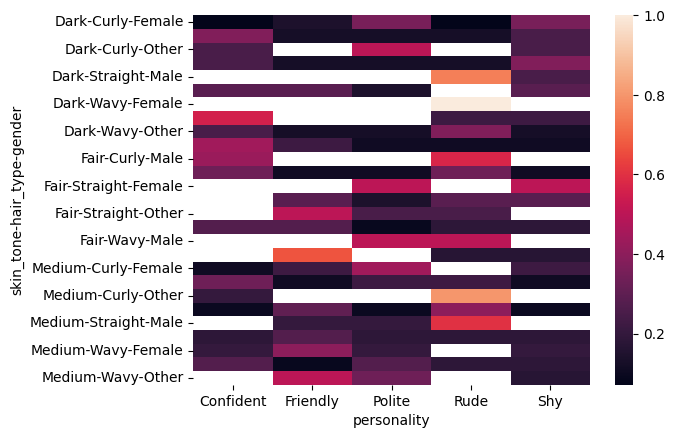

In [83]:
sns.heatmap(data1.groupby(['skin_tone', 'hair_type', 'gender'])['personality'].value_counts(normalize=True).unstack())

- We can say - 
    - Dark-Wavy-Male -> more confident
    - Fair-Wavy-Other -> more friendly
    - Fair-Wavy_Male -> more polite
    - so on...

### **CLUSTER MAP**

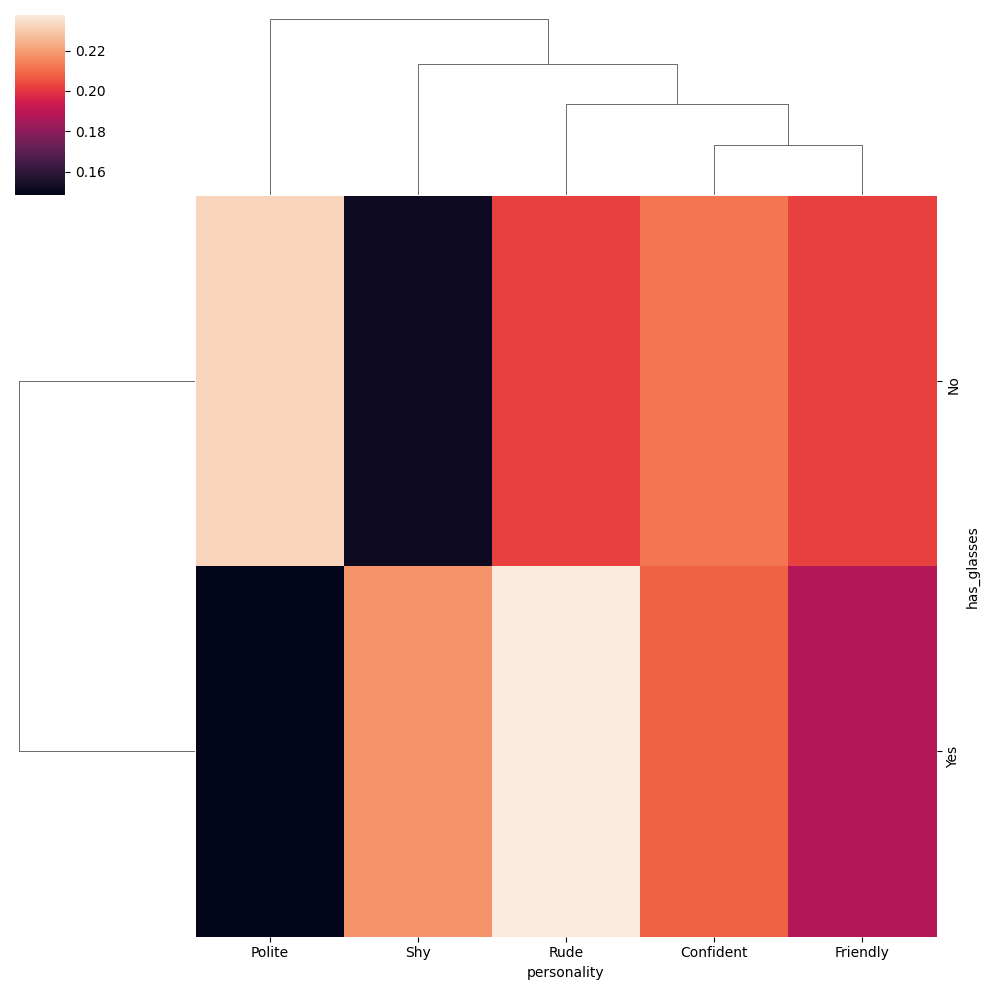

In [90]:
sns.clustermap((data1.groupby(['has_glasses'])['personality'].value_counts(normalize=True).unstack()))

In [91]:
data2 = sns.load_dataset('penguins')
data2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [93]:
data2.dropna(inplace=True, axis=0)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


# **Numrical-Numerical**
---

### **Scatter Plot**

<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

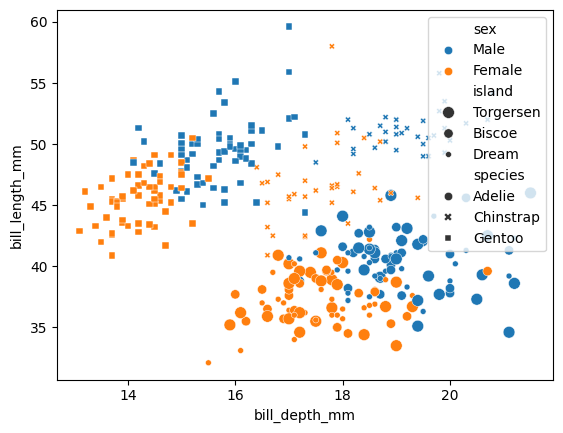

In [110]:
sns.scatterplot(y=data2['bill_length_mm'], x=data2['bill_depth_mm'], 
                hue=data2['sex'], style=data2['species'], size=data2['island'])

## **Categorical-Numerical**

### **BAR PLOT**

<Axes: xlabel='species', ylabel='body_mass_g'>

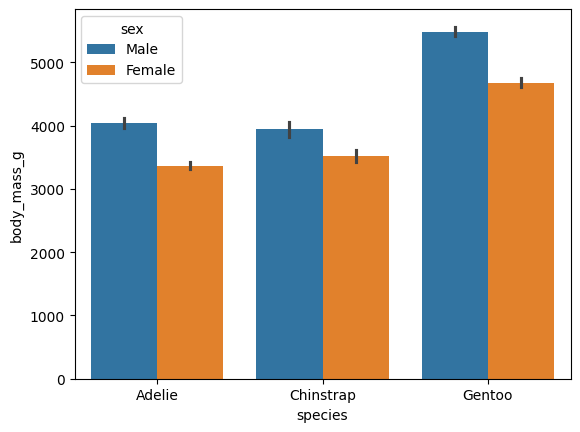

In [115]:
sns.barplot(x=data2['species'], y=data2['body_mass_g'], hue=data2['sex'])

<Axes: xlabel='species', ylabel='flipper_length_mm'>

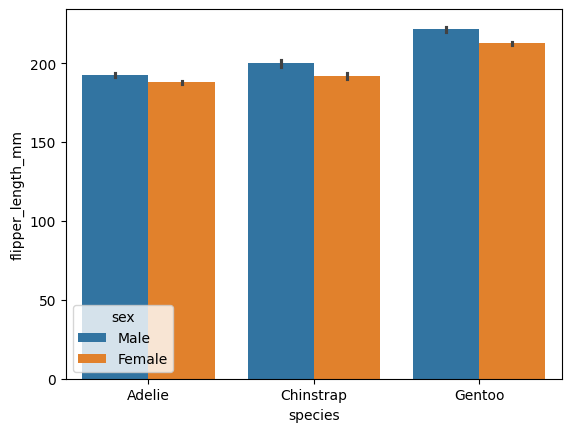

In [120]:
sns.barplot(x=data2['species'], y=data2['flipper_length_mm'], hue=data2['sex'])

<Axes: xlabel='species', ylabel='bill_depth_mm'>

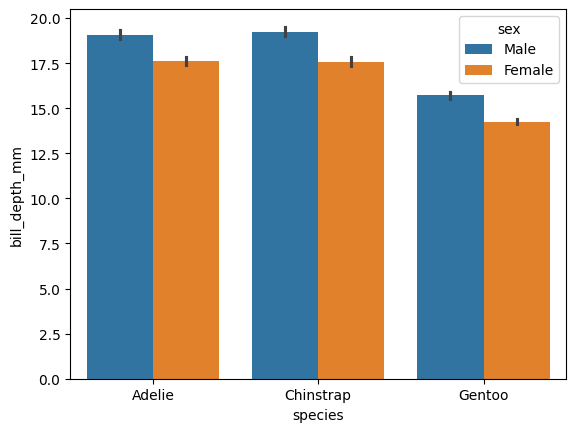

In [121]:
sns.barplot(x=data2['species'], y=data2['bill_depth_mm'], hue=data2['sex'])


### **DISTPLOT**

In [122]:
data2['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

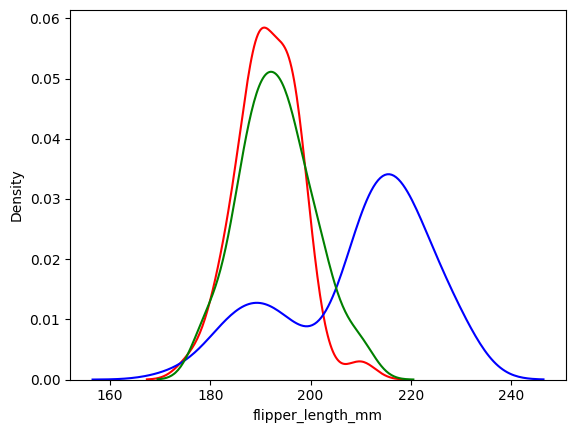

In [ ]:
sns.kdeplot(data2[data2['island'] == 'Torgersen']['flipper_length_mm'], color="r")
sns.kdeplot(data2[data2['island'] == 'Biscoe']['flipper_length_mm'], color="b")
sns.kdeplot(data2[data2['island'] == 'Dream']['flipper_length_mm'], color="g")

- Biscoe's penguine has abnormal flipper length (larger than Torgersen and Dream)

### **BOX PLOT**

<Axes: xlabel='island', ylabel='bill_length_mm'>

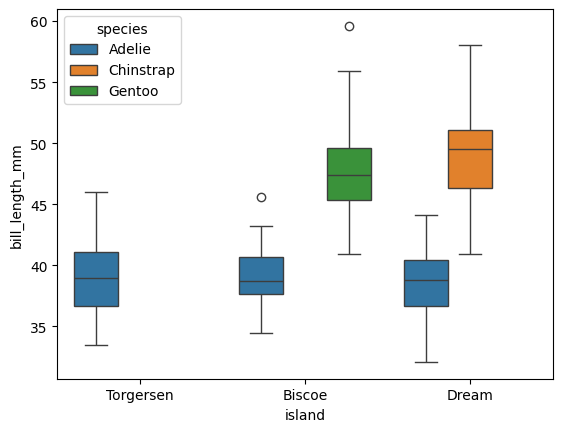

In [146]:
sns.boxplot(y=data2['bill_length_mm'], x=data2['island'], hue=data2['species'])

### **PAIR PLOT** 
- (All Scatter plots)

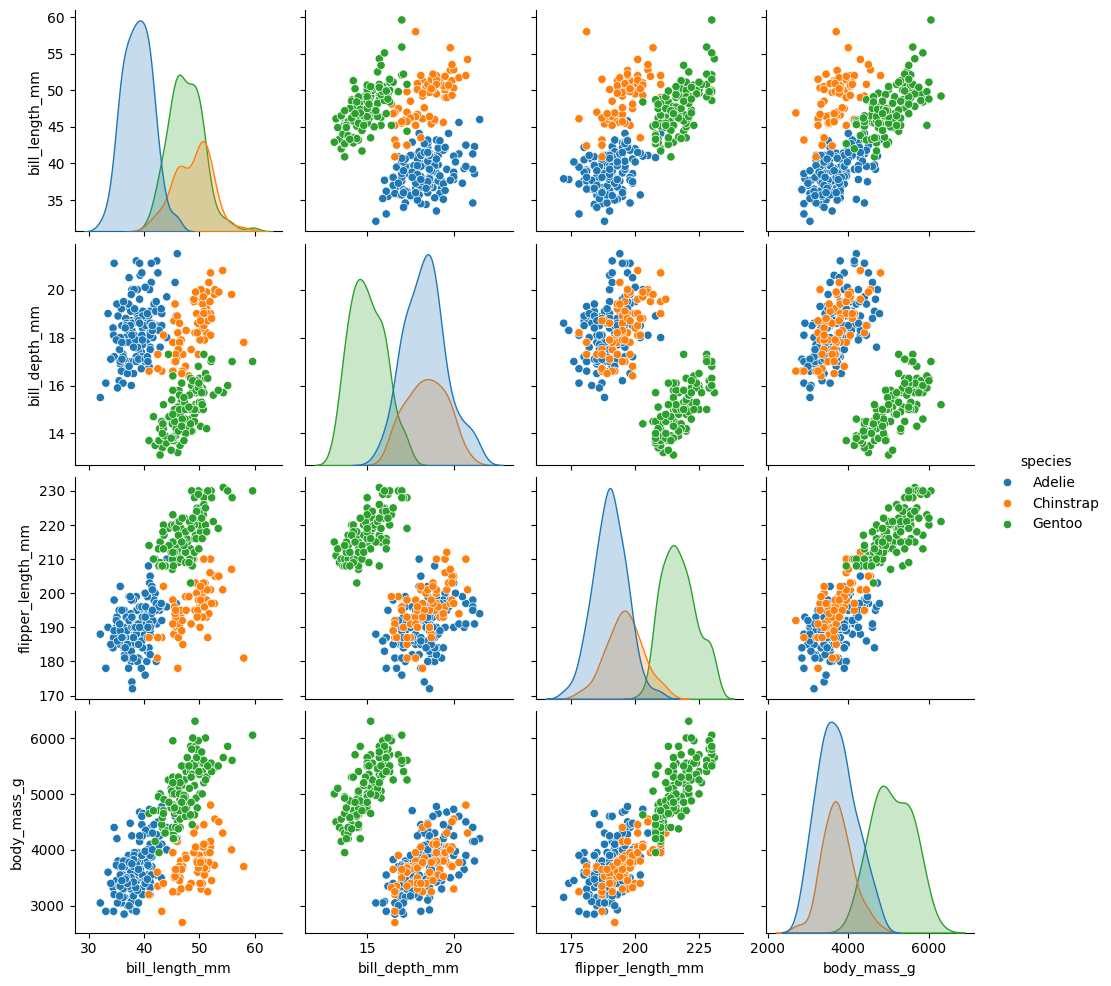

In [136]:
sns.pairplot(data2, hue='species')

- body_mass and flipper_len have perfectly linear relation
- body_mass and bill_len have perfectly linear relation for Adeile and Gentoo but Chinstrap's bill_len biased

### **Line Plot**

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

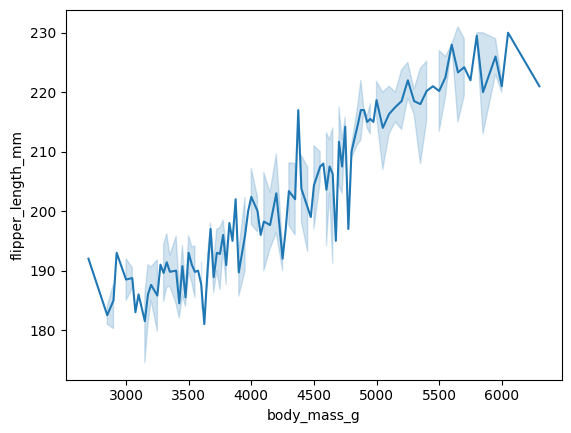

In [139]:
sns.lineplot(x=data2['body_mass_g'], y=data2['flipper_length_mm'])

<Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

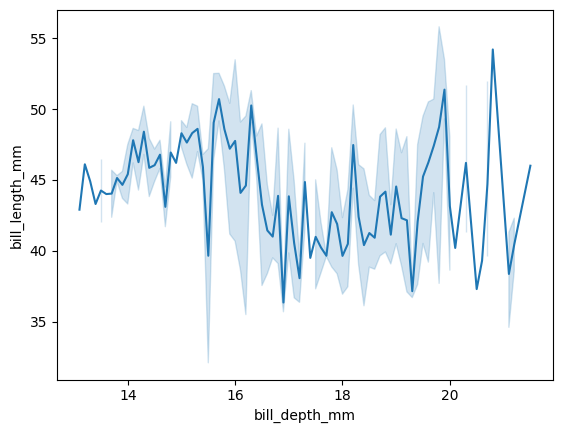

In [140]:
sns.lineplot(y=data2['bill_length_mm'], x=data2['bill_depth_mm'])

In [151]:
pd.crosstab(data2['island'], [ data2['species'],data2['sex']])

species   Adelie      Chinstrap      Gentoo     
sex       Female Male    Female Male Female Male
island                                          
Biscoe        22   22         0    0     58   61
Dream         27   28        34   34      0    0
Torgersen     24   23         0    0      0    0